## Simple demonstration of calculating segmentation metrics

In [1]:
import os
import sys
sys.path.append('..')
import segmetrics

import numpy as np
from skimage.io import imread

In [2]:
# load a ground truth - prediction image pair
n = 1
p = '/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12'
true = imread(os.path.join(p, 'labels_compressed', f'l_{n}.tif'))
pred = imread(os.path.join(p, 'segmented_2019-11-27', f's_{n}.tif'))

In [3]:
result = segmetrics.calculate(true, pred)

## visualize the metrics

In [4]:
# uncomment for interactive
# %matplotlib qt

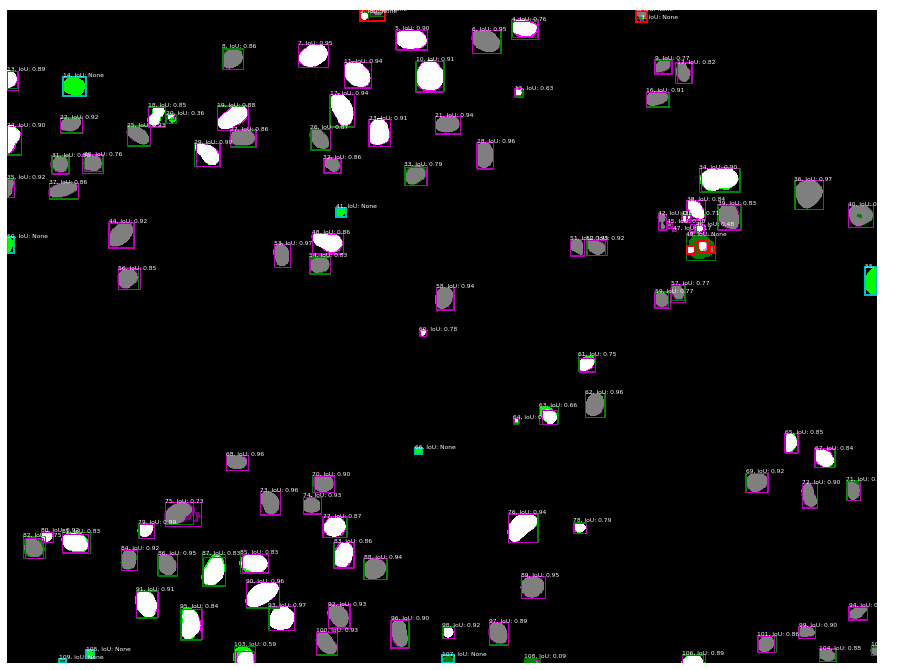

In [5]:
result.plot()

In [6]:
print(result.results)

Segmentation Metrics (n=1)
n_true_labels: 110.000
n_pred_labels: 103.000
n_true_positives: 97.000
n_false_positives: 6.000
n_false_negatives: 8.000
IoU: 0.838
Jaccard: 0.874
pixel_identity: 0.991
localization_error: 2.635


## plot some stats

In [7]:
import matplotlib.pyplot as plt

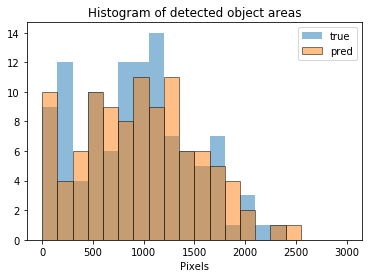

In [8]:
bins = np.linspace(0,3000,21)

plt.figure()
plt.hist(result._reference.areas, bins, alpha=0.5, label='true')
plt.hist(result._predicted.areas, bins, alpha=0.5, label='pred', edgecolor='k')
plt.legend()
plt.title('Histogram of detected object areas')
plt.xlabel('Pixels')
plt.show()

## do some batch processing

In [9]:
files = []
for n in range(10):
    true = os.path.join(p, 'labels_compressed', f'l_{n}.tif')
    pred = os.path.join(p, 'segmented_2019-11-27', f's_{n}.tif')
    files.append((true, pred))

In [10]:
batch_result = segmetrics.batch(files)

/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12/segmented_2019-11-27/s_0.tif
/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12/segmented_2019-11-27/s_1.tif
/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12/segmented_2019-11-27/s_2.tif
/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12/segmented_2019-11-27/s_3.tif
/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12/segmented_2019-11-27/s_4.tif
/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12/segmented_2019-11-27/s_5.tif
/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12/segmented_2019-11-27/s_6.tif
/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12/segmented_2019-11-27/s_7.tif
/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12/segmented_2019-11-27/s_8.tif
/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12/segmented_2019-11-27/s_9.tif


In [11]:
print(batch_result)

Segmentation Metrics (n=10)
n_true_labels: 2350.000
n_pred_labels: 2291.000
n_true_positives: 2175.000
n_false_positives: 86.000
n_false_negatives: 96.000
IoU: 0.858
Jaccard: 0.923
pixel_identity: 0.983
localization_error: 2.172


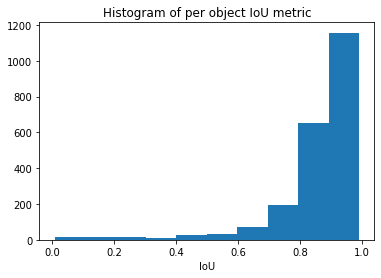

In [12]:
plt.figure()
plt.hist(batch_result.per_object_IoU)
plt.title('Histogram of per object IoU metric')
plt.xlabel('IoU')
plt.show()

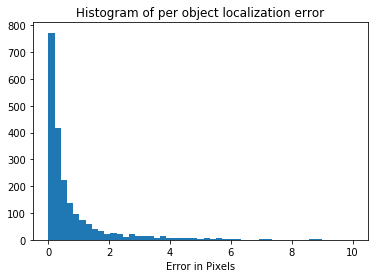

In [13]:
plt.figure()
plt.hist(batch_result.per_object_localization_error, bins=np.linspace(0,10,50))
plt.title('Histogram of per object localization error')
plt.xlabel('Error in Pixels')
plt.show()